In [5]:
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
import glob

# Buscar el archivo CSV con patrón
csv_files = glob.glob('../output/gaia_cleaned_data/part-00000-*.csv')

# Verifica si se encontró alguno
if csv_files:
    df = pd.read_csv(csv_files[0])
    print("Archivo cargado correctamente ")
    display(df.head())
else:
    print("No se encontró ningún archivo CSV.")


Archivo cargado correctamente 


,source_id,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,bp_rp,teff_gspphot,distance_gspphot
0,5.896163e+18,214.737751,-54.230564,0.698365,-5.695725,-0.236955,19.456598,1.653389,NaN,NaN
1,5.896163e+18,214.745086,-54.227937,0.421354,-8.067340,-0.376036,17.589428,1.719223,NaN,NaN
2,5.896163e+18,214.739672,-54.228535,0.233026,-9.796336,-2.428630,15.253755,1.988202,NaN,NaN
3,5.896163e+18,214.747372,-54.235492,0.837746,-8.284844,-2.357360,20.154074,1.878670,NaN,NaN
4,5.896163e+18,214.749109,-54.238663,0.413912,-1.838834,-6.605636,18.573895,1.601576,NaN,NaN


In [7]:
# Ver porcentaje de nulos por columna
porcentaje_nulos = df.isnull().mean().sort_values(ascending=False) * 100
porcentaje_nulos.to_frame("Porcentaje de Nulos (%)")

,Porcentaje de Nulos (%)
teff_gspphot,50.726294
distance_gspphot,50.726294
bp_rp,1.587599
source_id,0.000000
ra,0.000000
dec,0.000000
parallax,0.000000
pmra,0.000000
pmdec,0.000000
phot_g_mean_mag,0.000000


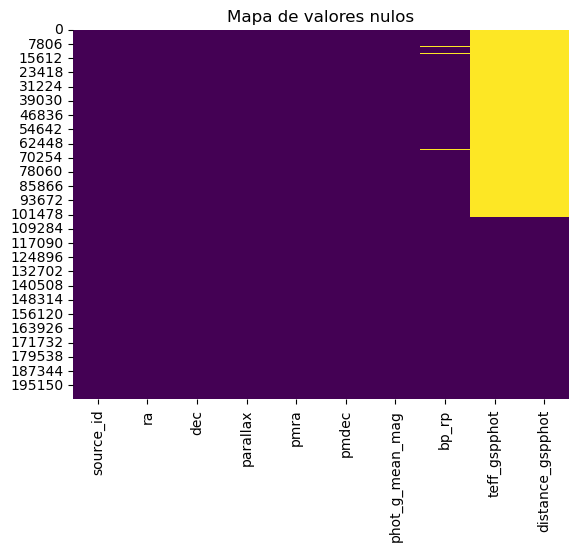

In [8]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Mapa de valores nulos')
plt.show()

In [10]:
#elegir un aleatorio de 1000 filas
df_sample = df.sample(n=1000, random_state=42)

<Axes: >

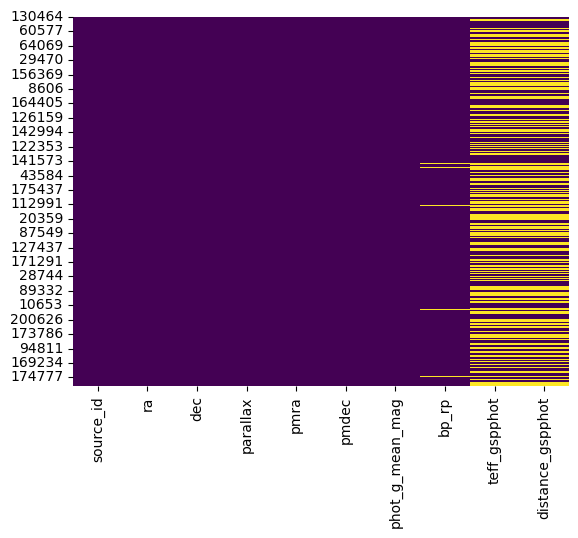

In [11]:
#ver los nulos
sns.heatmap(df_sample.isna(), cbar=False, cmap='viridis')

In [12]:
cols = ['ra', 'dec', 'parallax', 'pmra', 'pmdec', 'phot_g_mean_mag', 'bp_rp', 'teff_gspphot', 'distance_gspphot']
df_subset = df_sample[cols]

imputer = KNNImputer(n_neighbors=3)
df_imputed = imputer.fit_transform(df_subset)

df_imputed = pd.DataFrame(df_imputed, columns=cols)

In [14]:
df_imputed.head()

,ra,dec,parallax,pmra,pmdec,phot_g_mean_mag,bp_rp,teff_gspphot,distance_gspphot
0,86.335350,-53.123565,0.120271,0.429843,1.609830,17.331526,0.958517,5150.122070,1866.489990
1,79.425843,-63.242521,-0.134847,1.614855,0.194448,17.947308,1.273787,4507.249512,1566.161743
2,92.873901,-20.618800,1.045125,-2.762979,-3.046708,17.950777,1.714767,4129.125488,1545.485718
3,245.624980,-71.567211,1.089273,-13.839012,-23.790201,14.224171,0.807352,4796.636719,1639.624247
4,89.341610,-55.474347,1.025075,-0.777285,3.835260,17.188948,1.507154,4128.033203,1184.467163


<Axes: >

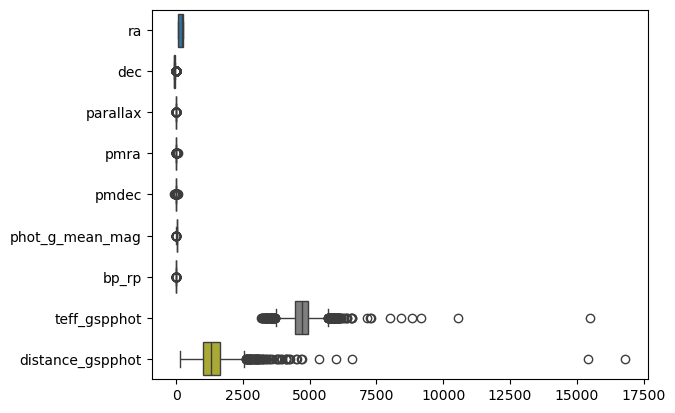

In [15]:
#ver si hay algun valor atipico
sns.boxplot(data=df_imputed, orient='h')

<Axes: >

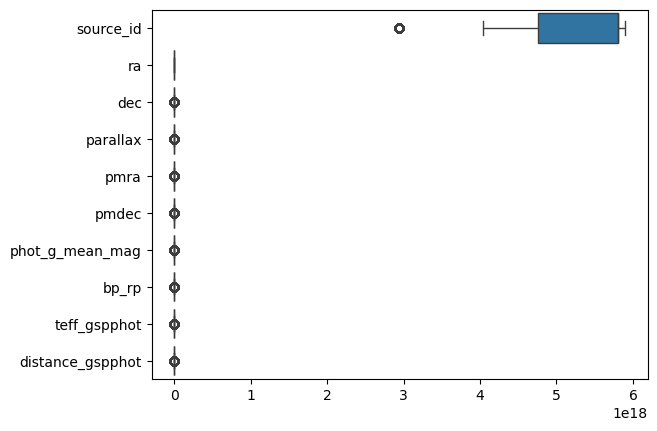

In [16]:
sns.boxplot(data=df, orient='h')

In [17]:
print(df.head(5))

      source_id          ra        dec  parallax      pmra     pmdec  \
0  5.896163e+18  214.737751 -54.230564  0.698365 -5.695725 -0.236955   
1  5.896163e+18  214.745086 -54.227937  0.421354 -8.067340 -0.376036   
2  5.896163e+18  214.739672 -54.228535  0.233026 -9.796336 -2.428630   
3  5.896163e+18  214.747372 -54.235492  0.837746 -8.284844 -2.357360   
4  5.896163e+18  214.749109 -54.238663  0.413912 -1.838834 -6.605636   

   phot_g_mean_mag     bp_rp  teff_gspphot  distance_gspphot  
0        19.456598  1.653389           NaN               NaN  
1        17.589428  1.719223           NaN               NaN  
2        15.253755  1.988202           NaN               NaN  
3        20.154074  1.878670           NaN               NaN  
4        18.573895  1.601576           NaN               NaN  


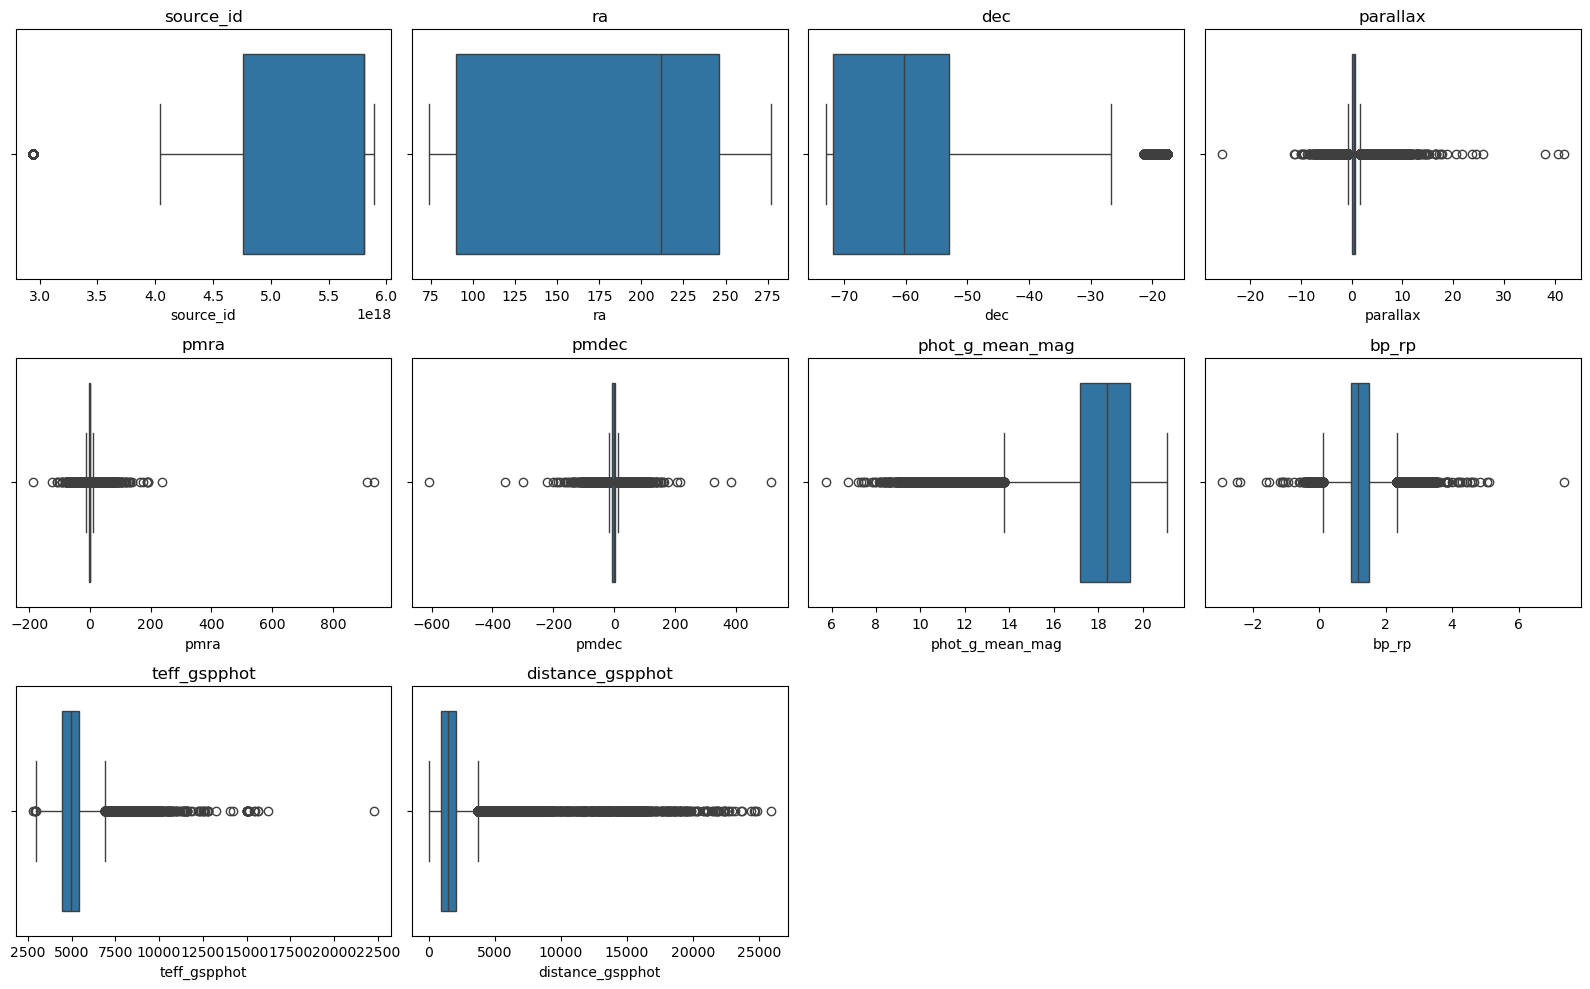

In [19]:
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [20]:
#ver rango (min y max) de cada columna
rango = df[numeric_cols].agg(['min', 'max']).T
print("Rango de valores por columna:")
print(rango)

Rango de valores por columna:
                           min           max
source_id         2.938951e+18  5.896513e+18
ra                7.387355e+01  2.768539e+02
dec              -7.299009e+01 -1.758826e+01
parallax         -2.552388e+01  4.173949e+01
pmra             -1.883615e+02  9.358402e+02
pmdec            -6.084471e+02  5.151805e+02
phot_g_mean_mag   5.731767e+00  2.110977e+01
bp_rp            -2.938018e+00  7.360149e+00
teff_gspphot      2.773281e+03  2.229968e+04
distance_gspphot  2.391270e+01  2.588574e+04


Hay algunos datos que no están en el rango físico admisible. Nos aseguraremos de corregirlos.

In [22]:
# ra → 0 a 360 grados
df['ra'] = df['ra'].apply(lambda x: max(0, min(x, 360)))

# dec → -90 a 90 grados
df['dec'] = df['dec'].apply(lambda x: max(-90, min(x, 90)))

# parallax (mas) → solo positivo
df['parallax'] = df['parallax'].apply(lambda x: abs(x))

# pmra / pmdec → movimiento propio entre -200 y 200
df['pmra'] = df['pmra'].apply(lambda x: max(-200, min(x, 200)))
df['pmdec'] = df['pmdec'].apply(lambda x: max(-200, min(x, 200)))

# phot_g_mean_mag → magnitud aparente (más bajo = más brillante), rango sensato: 3 a 21
df['phot_g_mean_mag'] = df['phot_g_mean_mag'].apply(lambda x: max(3, min(x, 21)))

# bp_rp → color, usualmente entre 0 y 5 (permitimos 0 mínimo, cortamos en 5)
df['bp_rp'] = df['bp_rp'].apply(lambda x: abs(x) if x < 0 else min(x, 5))

# teff_gspphot → temperatura efectiva: 2500 a 15000 K
df['teff_gspphot'] = df['teff_gspphot'].apply(lambda x: abs(x) if x < 0 else min(x, 15000))

# distance_gspphot → distancia: solo positiva, límite razonable ~50000 pc
df['distance_gspphot'] = df['distance_gspphot'].apply(lambda x: abs(x) if x < 0 else min(x, 50000))

# Mostrar resumen
print(df.describe())


          source_id             ra            dec       parallax  \
count  2.029480e+05  202948.000000  202948.000000  202948.000000   
mean   4.878690e+18     170.822423     -54.906760       0.646066   
std    1.138241e+18      78.337235      20.621066       0.820290   
min    2.938951e+18      73.873548     -72.990087       0.000003   
25%    4.760239e+18      89.879550     -71.842971       0.207642   
50%    5.805906e+18     211.475521     -60.257244       0.418387   
75%    5.806503e+18     246.302097     -52.993204       0.787030   
max    5.896513e+18     276.853899     -17.588257      41.739488   

                pmra          pmdec  phot_g_mean_mag          bp_rp  \
count  202948.000000  202948.000000    202948.000000  199726.000000   
mean       -1.307278      -1.317020        18.150591       1.276238   
std         6.145558       8.933461         1.803059       0.464391   
min      -188.361483    -200.000000         5.731767       0.000206   
25%        -4.261992      -5.542

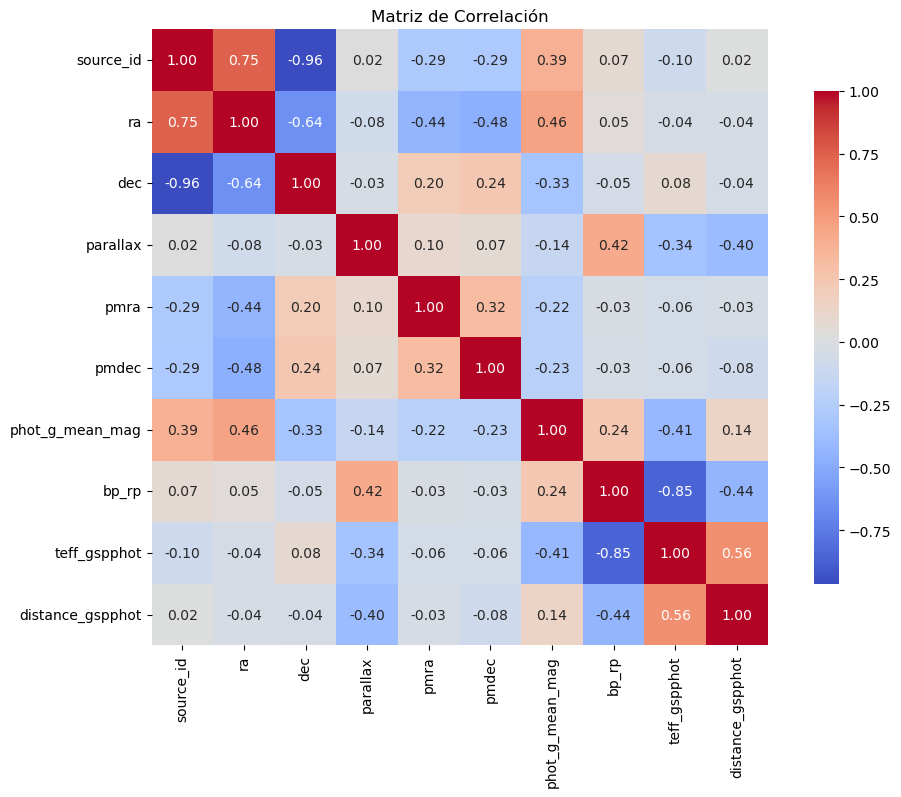

In [26]:
#correlacion de las columnas
correlation_matrix = df.corr()  
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

In [29]:
#cantidad de nulos por columnas
nulos_por_columna = df.isnull().sum()
print("Cantidad de nulos por columna:")
print(nulos_por_columna)

Cantidad de nulos por columna:
source_id                0
ra                       0
dec                      0
parallax                 0
pmra                     0
pmdec                    0
phot_g_mean_mag          0
bp_rp                 3222
teff_gspphot        102948
distance_gspphot    102948
dtype: int64


In [31]:
#describe parallax
df['parallax'].describe()

count    202948.000000
mean          0.646066
std           0.820290
min           0.000003
25%           0.207642
50%           0.418387
75%           0.787030
max          41.739488
Name: parallax, dtype: float64

In [32]:
#describe phot_g_mean_mag
df['phot_g_mean_mag'].describe()

count    202948.000000
mean         18.150591
std           1.803059
min           5.731767
25%          17.171747
50%          18.384544
75%          19.453083
max          21.000000
Name: phot_g_mean_mag, dtype: float64

In [ ]:
#rangos de los 4 cuartiles de parallax
cuartiles_parallax = df['parallax'].quantile([0.25, 0.5, 0.75, 1])
print("Cuartiles de parallax:")
print(cuartiles_parallax)

Cuartiles de parallax:
0.25     0.207642
0.50     0.418387
0.75     0.787030
1.00    41.739488
Name: parallax, dtype: float64


In [38]:
#rangos de los 4 cuartiles de phot_g_mean_mag
cuartiles_phot_g_mean_mag = df['phot_g_mean_mag'].quantile([0.25, 0.5, 0.75, 1])
print("Cuartiles de phot_g_mean_mag:")
print(cuartiles_phot_g_mean_mag)

Cuartiles de phot_g_mean_mag:
0.25    17.171747
0.50    18.384544
0.75    19.453083
1.00    21.000000
Name: phot_g_mean_mag, dtype: float64


In [35]:
#imputar valores nulos de bp_rp con el valor medio de bp_rp segun el cuartil de parallax
def imputar_bp_rp(row):
    if pd.isnull(row['bp_rp']):
        if row['parallax'] <= cuartiles_parallax[0.25]:
            return df[df['parallax'] <= cuartiles_parallax[0.25]]['bp_rp'].mean()
        elif row['parallax'] <= cuartiles_parallax[0.5]:
            return df[df['parallax'] > cuartiles_parallax[0.25]]['bp_rp'].mean()
        elif row['parallax'] <= cuartiles_parallax[0.75]:
            return df[df['parallax'] > cuartiles_parallax[0.5]]['bp_rp'].mean()
        else:
            return df[df['parallax'] > cuartiles_parallax[0.75]]['bp_rp'].mean()
    else:
        return row['bp_rp']

In [36]:
#imputar la columna bp_rp
df['bp_rp'] = df.apply(imputar_bp_rp, axis=1)
# Verificar si se imputaron los valores nulos
print("Cantidad de nulos en bp_rp después de la imputación:")
print(df['bp_rp'].isnull().sum())

Cantidad de nulos en bp_rp después de la imputación:
0


In [41]:
#medias de distancia_gspphot por cuartil de parallax
medias_distancia_por_cuartil = df.groupby(pd.cut(df['parallax'], bins=cuartiles_parallax)).mean()['distance_gspphot']
print("Medias de distance_gspphot por cuartil de parallax:")
print(medias_distancia_por_cuartil)

Medias de distance_gspphot por cuartil de parallax:
parallax
(0.208, 0.418]     2009.697346
(0.418, 0.787]     1429.157436
(0.787, 41.739]     737.277903
Name: distance_gspphot, dtype: float64


C:\Users\jimen\AppData\Local\Temp\ipykernel_36456\3491709291.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias_distancia_por_cuartil = df.groupby(pd.cut(df['parallax'], bins=cuartiles_parallax)).mean()['distance_gspphot']


In [44]:
#imputar teff_gspphot con la media de teff_gspphot global (la manera mas razonal)
media_teff_global = df['teff_gspphot'].mean()
df['teff_gspphot'] = df['teff_gspphot'].fillna(media_teff_global)
# Verificar si se imputaron los valores nulos
print("Cantidad de nulos en teff_gspphot después de la imputación:")
print(df['teff_gspphot'].isnull().sum())

Cantidad de nulos en teff_gspphot después de la imputación:
0


In [45]:
#cantidad de nulos por columna después de imputar
nulos_por_columna_despues = df.isnull().sum()
print("Cantidad de nulos por columna después de imputar:")  
print(nulos_por_columna_despues)

Cantidad de nulos por columna después de imputar:
source_id               0
ra                      0
dec                     0
parallax                0
pmra                    0
pmdec                   0
phot_g_mean_mag         0
bp_rp                   0
teff_gspphot            0
distance_gspphot    50737
dtype: int64


In [46]:
# Imputar nulos en 'distance_gspphot' con la media de 'distance_gspphot' global
media_distance_global = df['distance_gspphot'].mean()
df['distance_gspphot'] = df['distance_gspphot'].fillna
(media_distance_global)
# Verificar si se imputaron los valores nulos
print("Cantidad de nulos en distance_gspphot después de la imputación:")
print(df['distance_gspphot'].isnull().sum())


Cantidad de nulos en distance_gspphot después de la imputación:
0
